In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as plt

from cell_mosaics import CoverageDensityMapper, generate_example_neurons

In [5]:
# Generate toy neuron cell_outlines
field_size = 1000
cells = generate_example_neurons(n_cells=40, field_size=field_size, polygon_type='irregular')
len(cells)

40

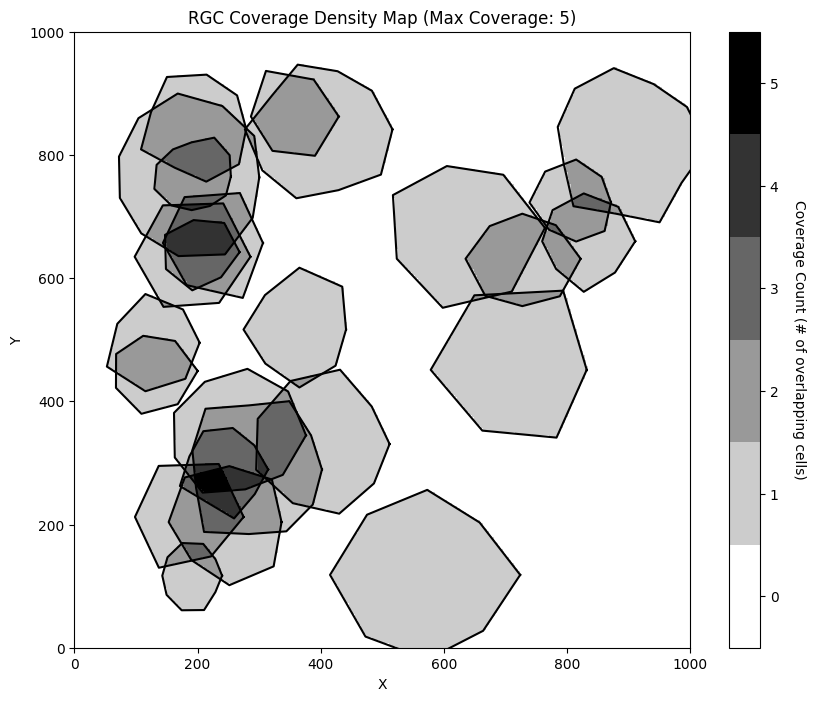

{'max_coverage': 5,
 'mean_coverage': 1.4142020948860134,
 'coverage_std': 0.7473071603224782,
 'area_covered_fraction': 0.446325,
 'total_pixels': 160000,
 'covered_pixels': 71412}

In [13]:
# Create the coverage mapper and add cell_outlines
mapper = CoverageDensityMapper(field_bounds=(0, field_size, 0, field_size), resolution=400)
mapper.add_multiple_polygons(cells)

# Plot coverage and show statistics
fig, ax, im = mapper.plot_coverage(colormap='gray_r', plot_cell_outlines=True, edgecolor='k')
plt.show()

stats = mapper.get_coverage_statistics()
stats

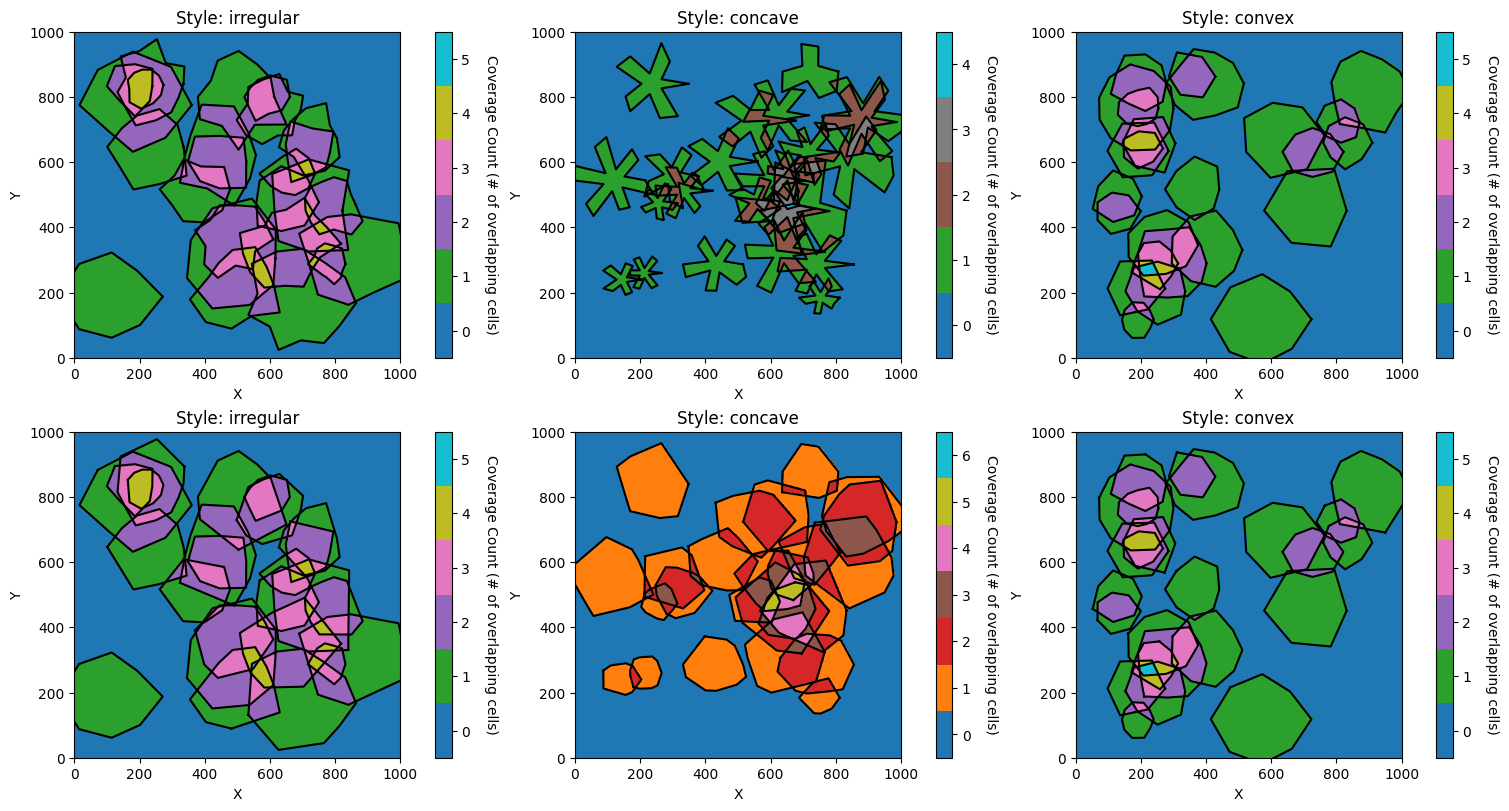

In [14]:
# Try different polygon styles and compare
styles = ['irregular', 'concave', 'convex']
fig, axes = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
for ax_col, st in zip(axes.T, styles):
    for i, ax in enumerate(ax_col):
        cells = generate_example_neurons(n_cells=25, field_size=field_size, polygon_type=st)
        mapper = CoverageDensityMapper(field_bounds=(0, field_size, 0, field_size), resolution=500)

        if i == 0:
            mapper.add_multiple_polygons(cells)
        else:
            mapper.add_multiple_hulls(cells)
        _ = mapper.plot_coverage(ax=ax, colormap='tab10', show_max_coverage=True, alpha=1.0, plot_cell_outlines=True, edgecolor='k')[1]
        ax.set_title(f'Style: {st}')
plt.show()